In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os 
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
KAGGLE_PATH = "/Users/taa/Documents/kaggle/"

In [3]:
DATA_PATH = os.path.join(KAGGLE_PATH, "data", "birdclef-2025")
os.listdir(DATA_PATH)

['.DS_Store',
 'test_soundscapes',
 'train_audio',
 'train_soundscapes',
 'recording_location.txt',
 'train.csv',
 'taxonomy.csv',
 'sample_submission.csv']

# Check metadata

In [4]:
meta_df = pd.read_csv(os.path.join(DATA_PATH, "train.csv"))

In [5]:
meta_df.head()

primary_label secondary_labels  type              filename collection  \
0       1139490             ['']  ['']  1139490/CSA36385.ogg        CSA   
1       1139490             ['']  ['']  1139490/CSA36389.ogg        CSA   
2       1192948             ['']  ['']  1192948/CSA36358.ogg        CSA   
3       1192948             ['']  ['']  1192948/CSA36366.ogg        CSA   
4       1192948             ['']  ['']  1192948/CSA36373.ogg        CSA   

   rating                                                url  latitude  \
0     0.0  http://colecciones.humboldt.org.co/rec/sonidos...    7.3206   
1     0.0  http://colecciones.humboldt.org.co/rec/sonidos...    7.3206   
2     0.0  http://colecciones.humboldt.org.co/rec/sonidos...    7.3791   
3     0.0  http://colecciones.humboldt.org.co/rec/sonidos...    7.2800   
4     0.0  http://colecciones.humboldt.org.co/rec/sonidos...    7.3791   

   longitude        scientific_name            common_name             author  \
0   -73.7128   Ragoniella pulchella   Ragoniella pulchella  Fabio A. Sarria-S   
1   -73.7128   Ragoniella pulchella   Ragoniella pulchella  Fabio A. Sarria-S   
2   -73.7313  Oxyprora surinamensis  Oxyprora surinamensis  Fabio A. Sarria-S   
3   -73.8582  Oxyprora surinamensis  Oxyprora surinamensis  Fabio A. Sarria-S   
4   -73.7313  Oxyprora surinamensis  Oxyprora surinamensis  Fabio A. Sarria-S   

           license  
0  cc-by-nc-sa 4.0  
1  cc-by-nc-sa 4.0  
2  cc-by-nc-sa 4.0  
3  cc-by-nc-sa 4.0  
4  cc-by-nc-sa 4.0

In [6]:
meta_df["primary_label"].unique().size

206

In [7]:
meta_df

primary_label secondary_labels  type               filename collection  \
0           1139490             ['']  ['']   1139490/CSA36385.ogg        CSA   
1           1139490             ['']  ['']   1139490/CSA36389.ogg        CSA   
2           1192948             ['']  ['']   1192948/CSA36358.ogg        CSA   
3           1192948             ['']  ['']   1192948/CSA36366.ogg        CSA   
4           1192948             ['']  ['']   1192948/CSA36373.ogg        CSA   
...             ...              ...   ...                    ...        ...   
28559        ywcpar             ['']  ['']   ywcpar/iNat77392.ogg       iNat   
28560        ywcpar             ['']  ['']   ywcpar/iNat78624.ogg       iNat   
28561        ywcpar             ['']  ['']  ywcpar/iNat789234.ogg       iNat   
28562        ywcpar             ['']  ['']  ywcpar/iNat819873.ogg       iNat   
28563        ywcpar             ['']  ['']  ywcpar/iNat922688.ogg       iNat   

       rating                                                url  latitude  \
0         0.0  http://colecciones.humboldt.org.co/rec/sonidos...    7.3206   
1         0.0  http://colecciones.humboldt.org.co/rec/sonidos...    7.3206   
2         0.0  http://colecciones.humboldt.org.co/rec/sonidos...    7.3791   
3         0.0  http://colecciones.humboldt.org.co/rec/sonidos...    7.2800   
4         0.0  http://colecciones.humboldt.org.co/rec/sonidos...    7.3791   
...       ...                                                ...       ...   
28559     0.0    https://static.inaturalist.org/sounds/77392.m4a    7.6921   
28560     0.0    https://static.inaturalist.org/sounds/78624.wav    8.9918   
28561     0.0   https://static.inaturalist.org/sounds/789234.wav    9.2316   
28562     0.0   https://static.inaturalist.org/sounds/819873.mp3   10.5838   
28563     0.0   https://static.inaturalist.org/sounds/922688.wav    9.1156   

       longitude        scientific_name            common_name  \
0       -73.7128   Ragoniella pulchella   Ragoniella pulchella   
1       -73.7128   Ragoniella pulchella   Ragoniella pulchella   
2       -73.7313  Oxyprora surinamensis  Oxyprora surinamensis   
3       -73.8582  Oxyprora surinamensis  Oxyprora surinamensis   
4       -73.7313  Oxyprora surinamensis  Oxyprora surinamensis   
...          ...                    ...                    ...   
28559   -80.3379   Amazona ochrocephala  Yellow-crowned Parrot   
28560   -79.4877   Amazona ochrocephala  Yellow-crowned Parrot   
28561   -70.2041   Amazona ochrocephala  Yellow-crowned Parrot   
28562   -66.8545   Amazona ochrocephala  Yellow-crowned Parrot   
28563   -79.4907   Amazona ochrocephala  Yellow-crowned Parrot   

                  author          license  
0      Fabio A. Sarria-S  cc-by-nc-sa 4.0  
1      Fabio A. Sarria-S  cc-by-nc-sa 4.0  
2      Fabio A. Sarria-S  cc-by-nc-sa 4.0  
3      Fabio A. Sarria-S  cc-by-nc-sa 4.0  
4      Fabio A. Sarria-S  cc-by-nc-sa 4.0  
...                  ...              ...  
28559    Yennifer Alfaro     cc-by-nc 4.0  
28560      Evan Centanni  cc-by-nc-sa 4.0  
28561             Henrry        cc-by 4.0  
28562      Alejandro Luy     cc-by-nc 4.0  
28563        Kalvin Chan         cc-0 4.0  

[28564 rows x 13 columns]

### Label distribution

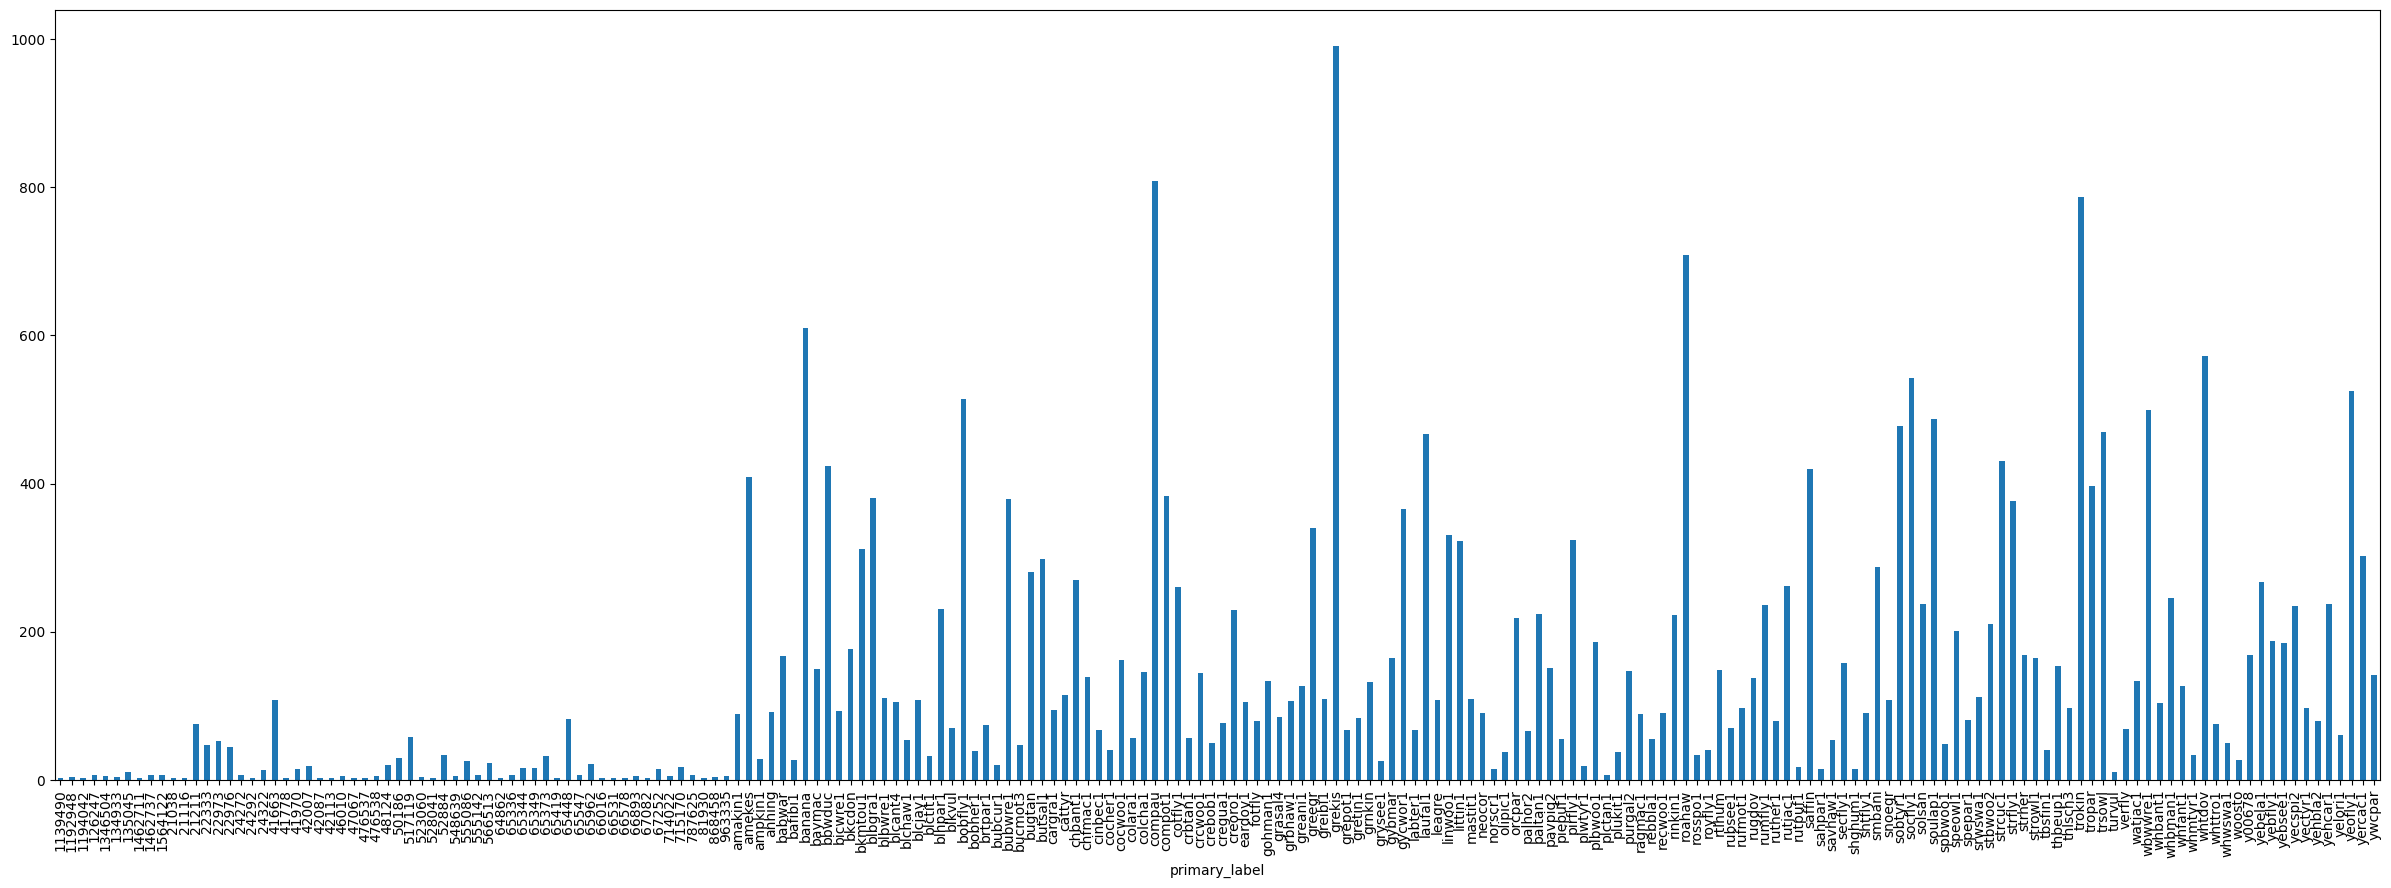

In [8]:
meta_df.groupby("primary_label").size().reset_index(name="count").plot.bar(
    x="primary_label", y="count", figsize=(30, 10), legend=False
);

### Check the distribution of ratings

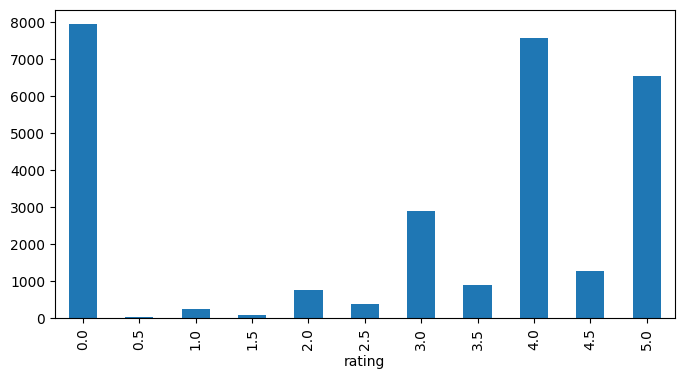

In [9]:
meta_df.groupby("rating").size().reset_index(name="count").plot.bar(
    x="rating", y="count", figsize=(8, 4), legend=False
);

### Check distribution of collection source

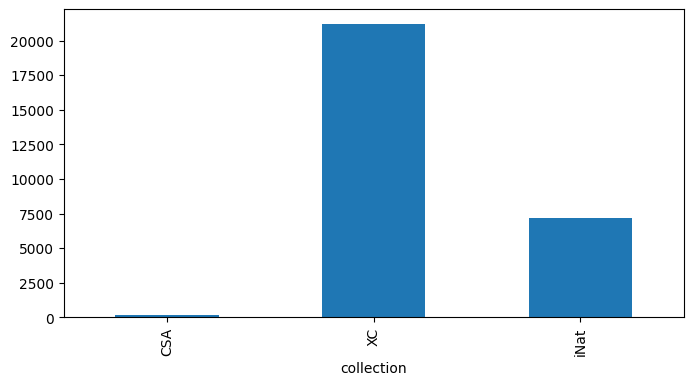

In [10]:
meta_df.groupby("collection").size().reset_index(name="count").plot.bar(
    x="collection", y="count", figsize=(8, 4), legend=False
);

In [11]:
rating_counts = meta_df.groupby(['rating', 'primary_label']).size().reset_index(name='count')
pivot_table = rating_counts.pivot(index='primary_label', columns='rating', values='count').fillna(0)

print(pivot_table)

rating          0.0  0.5  1.0  1.5   2.0  2.5   3.0   3.5    4.0   4.5    5.0
primary_label                                                                
1139490         2.0  0.0  0.0  0.0   0.0  0.0   0.0   0.0    0.0   0.0    0.0
1192948         4.0  0.0  0.0  0.0   0.0  0.0   0.0   0.0    0.0   0.0    0.0
1194042         3.0  0.0  0.0  0.0   0.0  0.0   0.0   0.0    0.0   0.0    0.0
126247          5.0  0.0  0.0  0.0   0.0  0.0   0.0   1.0    0.0   0.0    0.0
1346504         5.0  0.0  0.0  0.0   0.0  0.0   0.0   0.0    0.0   0.0    0.0
...             ...  ...  ...  ...   ...  ...   ...   ...    ...   ...    ...
yehcar1        71.0  0.0  2.0  0.0   8.0  2.0  26.0   4.0   52.0   9.0   64.0
yelori1         9.0  0.0  1.0  0.0   1.0  2.0   9.0   3.0   21.0   4.0   10.0
yeofly1        59.0  0.0  1.0  0.0  10.0  3.0  58.0  19.0  169.0  32.0  174.0
yercac1        23.0  0.0  7.0  0.0   4.0  7.0  29.0   8.0   90.0  39.0   95.0
ywcpar         27.0  0.0  0.0  0.0   5.0  2.0  13.0   4.0   38.0

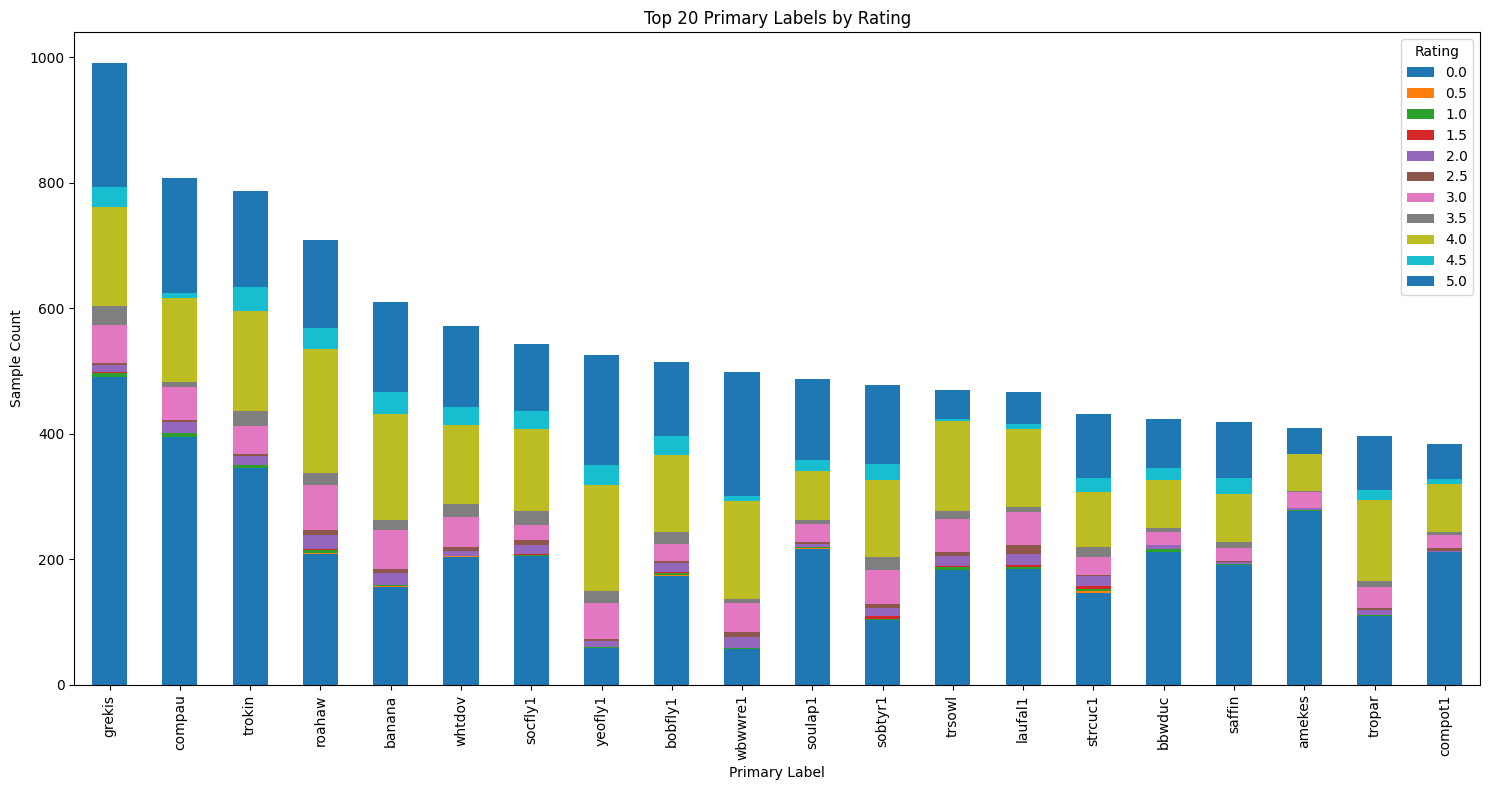

In [12]:
top_labels = pivot_table.sum(axis=1).sort_values(ascending=False).head(20).index
pivot_table_top = pivot_table.loc[top_labels]

pivot_table_top.plot(kind='bar', stacked=True, figsize=(15,8))
plt.title('Top 20 Primary Labels by Rating')
plt.xlabel('Primary Label')
plt.ylabel('Sample Count')
plt.legend(title='Rating')
plt.tight_layout()
plt.show()

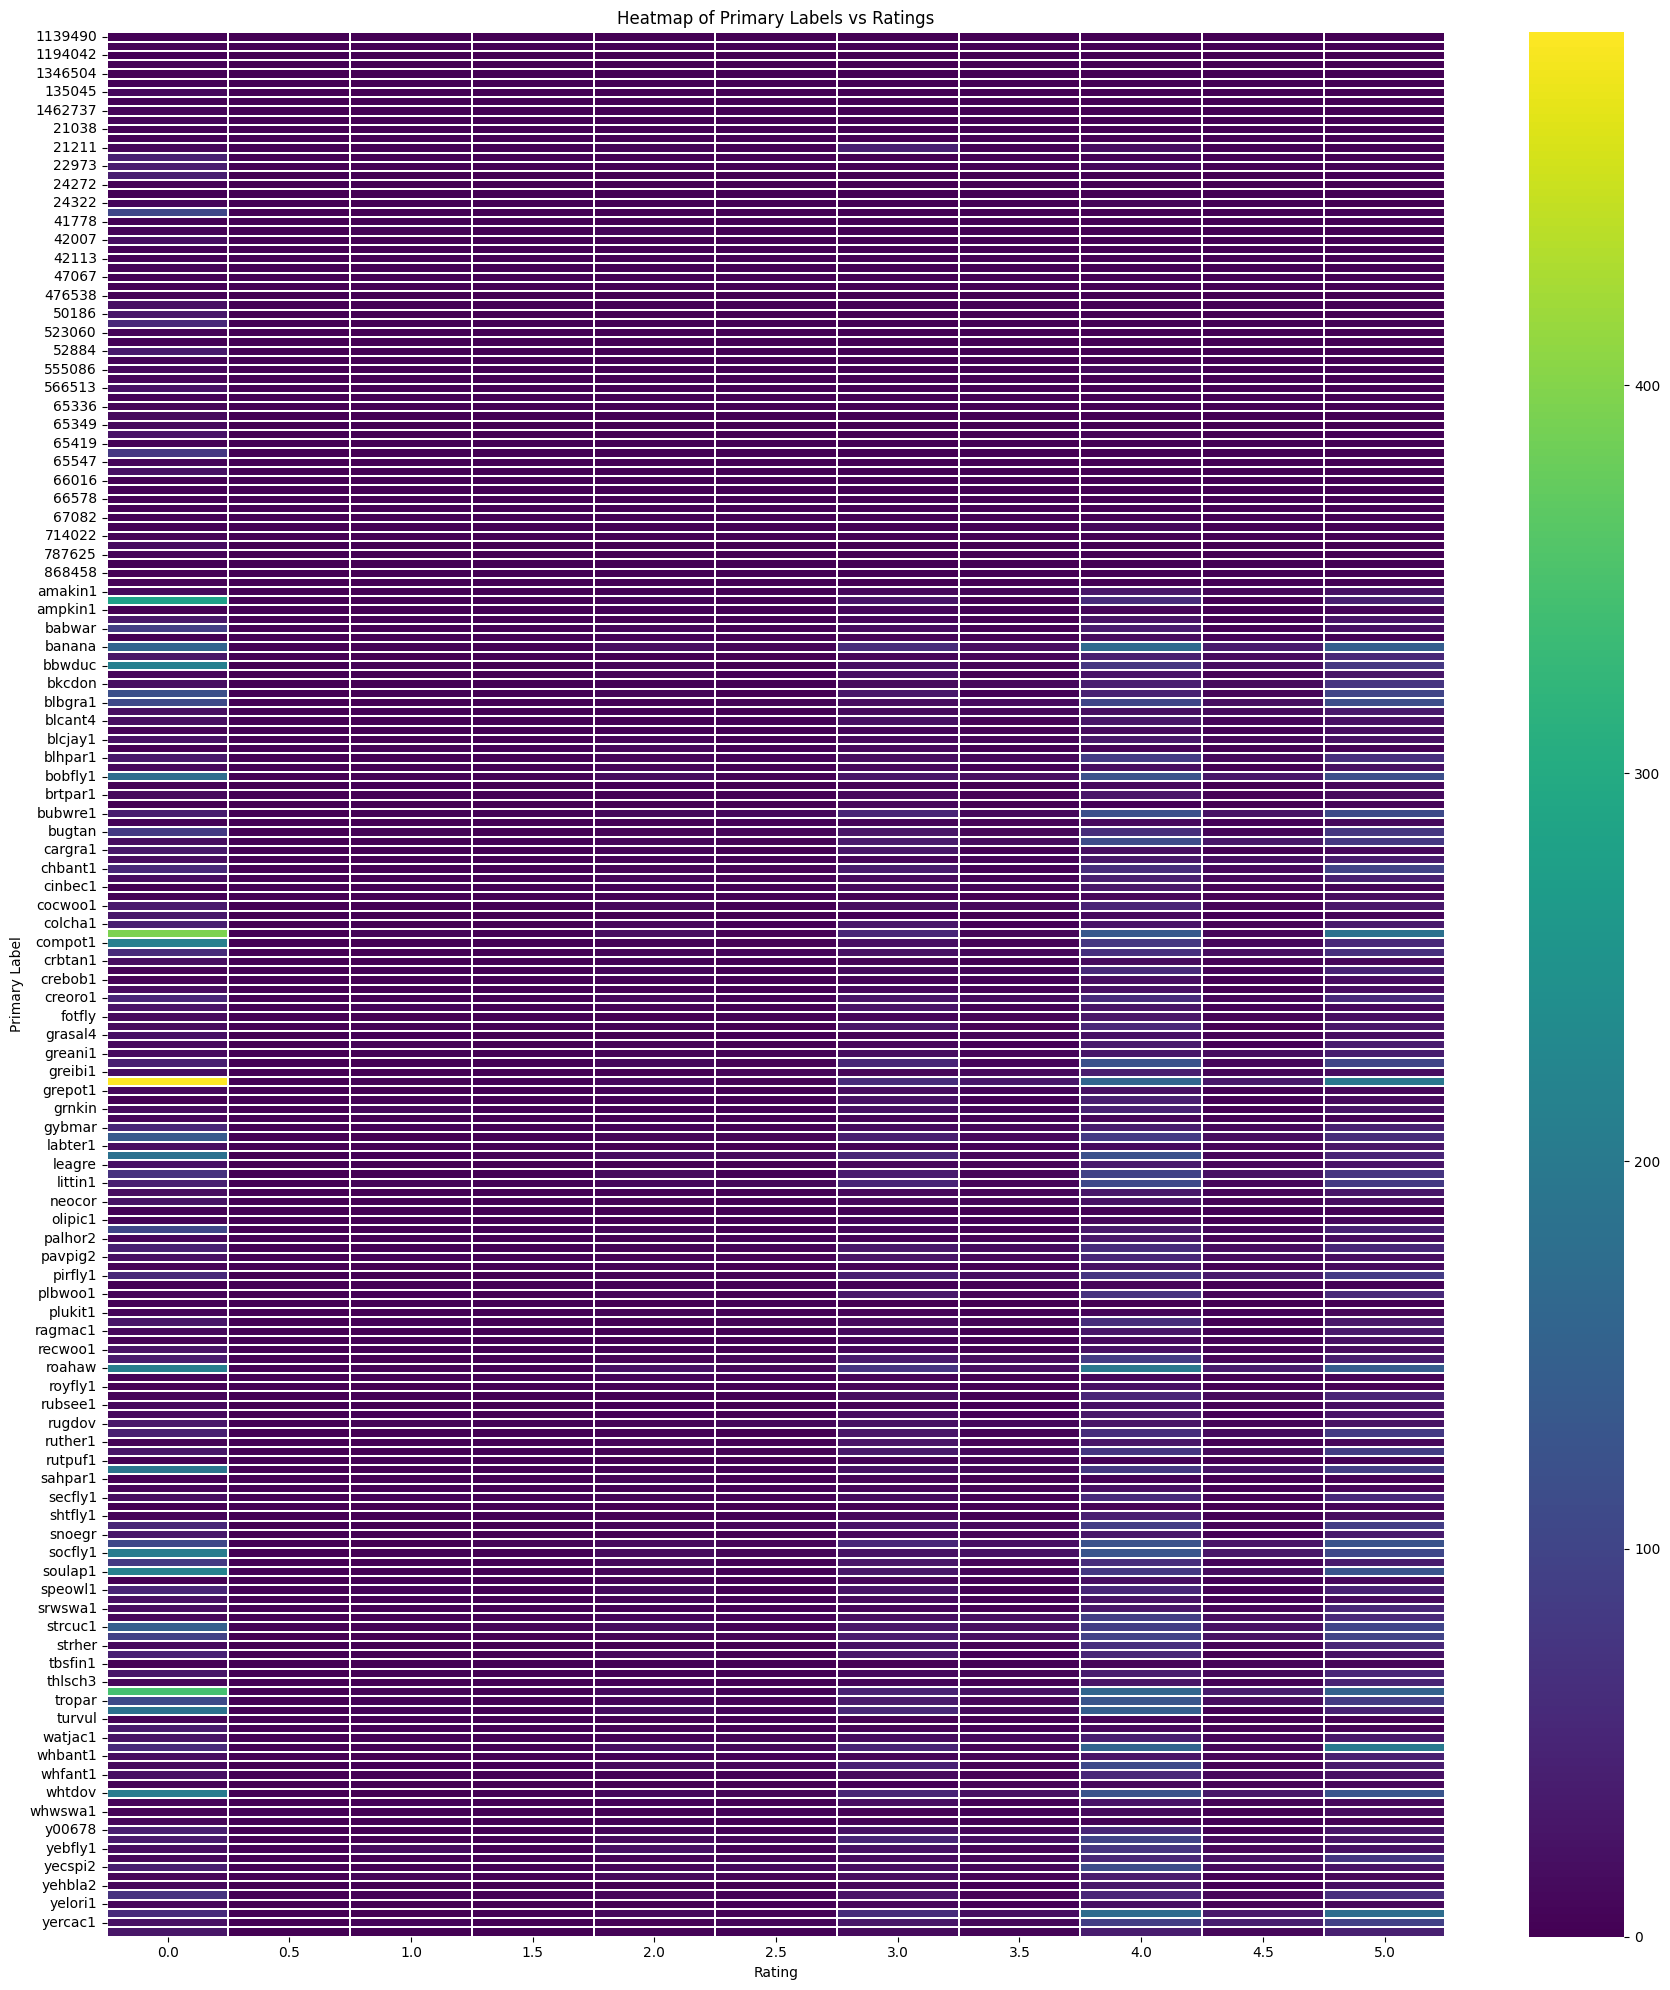

In [13]:
plt.figure(figsize=(18, 20))
sns.heatmap(pivot_table, cmap='viridis', linewidths=0.2)
plt.title('Heatmap of Primary Labels vs Ratings')
plt.xlabel('Rating')
plt.ylabel('Primary Label')
plt.tight_layout()
plt.show()

# Check train audio data

In [14]:
os.listdir(os.path.join(DATA_PATH, "train_audio"))

['crbtan1',
 '48124',
 '476537',
 '66016',
 '42087',
 'crcwoo1',
 'blcant4',
 '787625',
 '24292',
 '21116',
 '46010',
 'compau',
 'gybmar',
 '50186',
 'brtpar1',
 'whwswa1',
 '52884',
 '868458',
 'royfly1',
 'cinbec1',
 '963335',
 '476538',
 'leagre',
 'greibi1',
 'ampkin1',
 'plukit1',
 'greani1',
 'savhaw1',
 '22333',
 'rosspo1',
 'yelori1',
 'recwoo1',
 'rutjac1',
 '41970',
 'baymac',
 'butsal1',
 '555142',
 '.DS_Store',
 'grnkin',
 '21038',
 '41778',
 'cotfly1',
 'yebfly1',
 'bafibi1',
 'amakin1',
 '548639',
 'greegr',
 '66531',
 'blbgra1',
 'norscr1',
 'spepar1',
 'y00678',
 '24322',
 'smbani',
 '1139490',
 '65349',
 'watjac1',
 '65962',
 '21211',
 'laufal1',
 '67252',
 '65336',
 'strcuc1',
 '66578',
 'spbwoo1',
 'amekes',
 'whttro1',
 'trokin',
 'yehbla2',
 'blkvul',
 'grekis',
 'ywcpar',
 'sahpar1',
 '134933',
 'fotfly',
 'strfly1',
 '42113',
 'speowl1',
 'gohman1',
 '566513',
 'blcjay1',
 '715170',
 'rtlhum',
 'bucmot3',
 'chbant1',
 '47067',
 'stbwoo2',
 '135045',
 'whtdov',
 

In [15]:
bird_path = os.path.join(DATA_PATH, "train_audio", "ruther1")
os.listdir(bird_path)

['XC624692.ogg',
 'XC257299.ogg',
 'XC257298.ogg',
 'XC119211.ogg',
 'XC274912.ogg',
 'iNat682015.ogg',
 'XC116097.ogg',
 'XC357714.ogg',
 'XC496105.ogg',
 'XC117968.ogg',
 'XC300937.ogg',
 'XC257300.ogg',
 'XC681215.ogg',
 'XC257301.ogg',
 'XC257303.ogg',
 'XC117947.ogg',
 'XC257302.ogg',
 'XC458068.ogg',
 'XC239084.ogg',
 'XC239085.ogg',
 'XC61158.ogg',
 'XC708497.ogg',
 'XC504229.ogg',
 'XC300941.ogg',
 'XC702231.ogg',
 'XC702225.ogg',
 'XC239086.ogg',
 'XC251886.ogg',
 'XC300940.ogg',
 'iNat621680.ogg',
 'XC221587.ogg',
 'XC743056.ogg',
 'XC239083.ogg',
 'XC472232.ogg',
 'XC708491.ogg',
 'XC368384.ogg',
 'XC504763.ogg',
 'XC593186.ogg',
 'iNat514294.ogg',
 'XC395182.ogg',
 'XC178070.ogg',
 'XC770313.ogg',
 'XC593187.ogg',
 'XC708492.ogg',
 'XC2423.ogg',
 'XC534094.ogg',
 'XC120559.ogg',
 'XC817038.ogg',
 'XC708677.ogg',
 'XC943092.ogg',
 'XC843910.ogg',
 'XC512534.ogg',
 'XC176913.ogg',
 'XC657827.ogg',
 'XC243694.ogg',
 'XC2753.ogg',
 'XC691247.ogg',
 'XC52205.ogg',
 'XC896253.ogg

In [16]:
sample_path = os.path.join(bird_path, "XC257299.ogg")

In [17]:
y, sr = librosa.load(sample_path, sr=None)

In [18]:
from IPython.display import Audio, display
display(Audio(y, rate=sr))

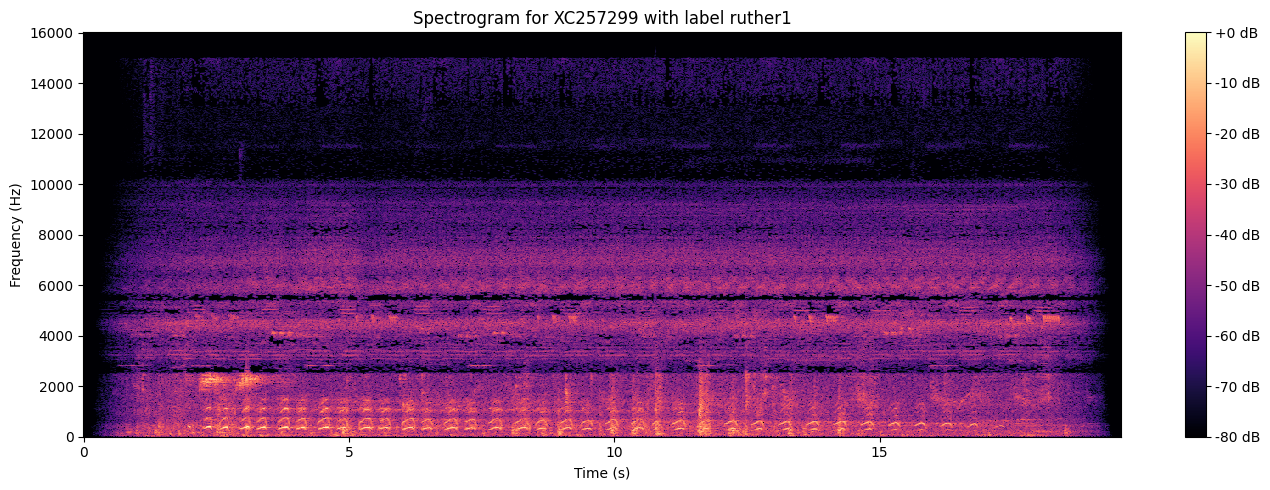

In [19]:
plt.figure(figsize=(14, 5))
D = librosa.stft(y, n_fft=2048, hop_length=512)
D_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
librosa.display.specshow(D_db, x_axis='time', y_axis='hz', sr=sr)
name_file = sample_path.split("/")[-1].split(".")[0]
bird_name =     sample_path.split("/")[-2]
plt.title(f'Spectrogram for {name_file} with label {bird_name}')
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()


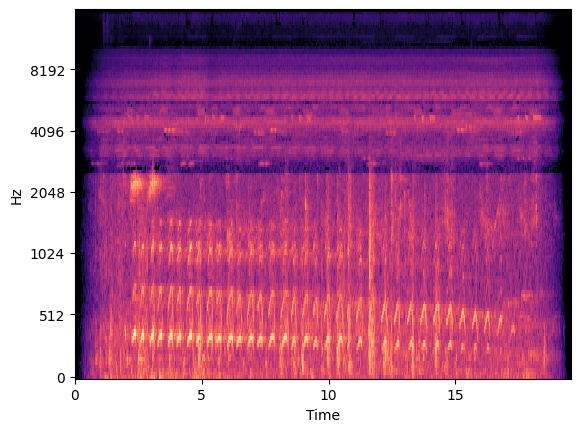

In [20]:
mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

librosa.display.specshow(mel_spec_db, x_axis='time', y_axis='mel', sr=sr);

In [20]:
mel_spec_db.shape # nmels x n_frames

(128, 1222)

In [21]:
D_db.shape # (n_fft / 2) + 1 x n_frames

(1025, 1222)

# Sliding-window (Segment-based) Classification with Majority Voting

1) check minimum time
2) split all to minimum time 
3) train on minimum time
4) during inference split the signal into minimum time windows
5) major vote

In [22]:
for animal in os.listdir(os.path.join(DATA_PATH, "train_audio")):
    animal_path = os.path.join(DATA_PATH, "train_audio", animal)
    if os.path.isdir(animal_path):
        print(f"Animal: {animal}, Number of files: {len(os.listdir(animal_path))}")
        for file in os.listdir(animal_path):
            file_path = os.path.join(animal_path, file)
            y, sr = librosa.load(file_path, sr=None)
            if len(y) > 0:
                print(f"File: {file}, Duration: {librosa.get_duration(y=y, sr=sr)} seconds")
            else:
                print(f"File: {file} is empty or could not be loaded.")
            

Animal: crbtan1, Number of files: 56
File: XC368718.ogg, Duration: 63.94775 seconds
File: XC537250.ogg, Duration: 20.610625 seconds
File: XC124140.ogg, Duration: 12.0424375 seconds
File: XC409344.ogg, Duration: 11.85959375 seconds
File: XC381962.ogg, Duration: 45.384 seconds
File: XC312930.ogg, Duration: 17.184 seconds
File: XC567307.ogg, Duration: 32.448 seconds
File: iNat74451.ogg, Duration: 40.70459375 seconds
File: XC424701.ogg, Duration: 33.456 seconds
File: iNat77116.ogg, Duration: 17.53109375 seconds
File: XC304266.ogg, Duration: 5.544 seconds
File: XC354337.ogg, Duration: 12.336 seconds
File: XC379461.ogg, Duration: 37.416 seconds
File: XC552695.ogg, Duration: 42.60571875 seconds
File: iNat77115.ogg, Duration: 17.879375 seconds
File: XC423493.ogg, Duration: 28.0555 seconds
File: XC716447.ogg, Duration: 41.9 seconds
File: XC433327.ogg, Duration: 32.83590625 seconds
File: iNat77071.ogg, Duration: 45.78134375 seconds
File: XC428302.ogg, Duration: 4.5453125 seconds
File: XC475777.o

In [10]:
MIN_CLIP_DURATION = 5
MAX_CLIP_DURATION = 10
MINIMUM_QUALITY = 3.0

In [11]:
meta_df.shape

(28564, 13)

In [12]:
filtered_df = meta_df[(meta_df["rating"] >= MINIMUM_QUALITY) | ( meta_df["rating"] == 0)]
filtered_df.shape

(27128, 13)

In [13]:
filtered_df.to_csv("/Users/taa/Documents/kaggle/kaggle_birdclef25/data/interim/train_filtered.csv", index=False)

In [26]:
filtered_meta_paths = filtered_df["filename"].values
filtered_meta_paths

array(['1139490/CSA36385.ogg', '1139490/CSA36389.ogg',
       '1192948/CSA36358.ogg', ..., 'ywcpar/iNat789234.ogg',
       'ywcpar/iNat819873.ogg', 'ywcpar/iNat922688.ogg'],
      shape=(27128,), dtype=object)

In [27]:
DATA_PATH

'/Users/taa/Documents/kaggle/data/birdclef-2025'

In [ ]:
def split_audio(y, sr, min_clip_duration=5, max_clip_duration=10):
    max_samples_per_clip = sr * max_clip_duration
    min_samples_per_clip = sr * min_clip_duration
    clips = []
    for i in range(0, len(y), max_samples_per_clip):
        clip = y[i:i + max_samples_per_clip]

        if len(clip) >= min_samples_per_clip:
            if len(clip) < max_samples_per_clip:
                clip = librosa.util.fix_length(clip, size=max_samples_per_clip)
            clips.append(clip)
    return clips

: 

In [ ]:
raw_samples = {}
for animal in os.listdir(os.path.join(DATA_PATH, "train_audio")):
    animal_path = os.path.join(DATA_PATH, "train_audio", animal)
    if os.path.isdir(animal_path):
        print(f"Animal: {animal}, Number of files: {len(os.listdir(animal_path))}")
        raw_samples[animal] = {}
        for _file in os.listdir(animal_path):
            meta_path = os.path.join(animal, _file)
            if meta_path in filtered_meta_paths:
                file_path = os.path.join(animal_path, _file)
                y, sr = librosa.load(file_path, sr=None)
                if len(y) > 0:
                    print(f"File: {_file}, Duration: {librosa.get_duration(y=y, sr=sr)} seconds")
                    clips = split_audio(
                        y,
                        sr,
                        min_clip_duration=MIN_CLIP_DURATION,
                        max_clip_duration=MAX_CLIP_DURATION,
                    )
                    raw_samples[animal].update({_file: clips})
                else:
                    print(f"File: {_file} is empty or could not be loaded.")
            else:
                print(f"File: {_file} is not in filtered metadata paths.")

Animal: crbtan1, Number of files: 56
File: XC368718.ogg, Duration: 63.94775 seconds
File: XC537250.ogg, Duration: 20.610625 seconds
File: XC124140.ogg, Duration: 12.0424375 seconds
File: XC409344.ogg, Duration: 11.85959375 seconds
File: XC381962.ogg, Duration: 45.384 seconds
File: XC312930.ogg, Duration: 17.184 seconds
File: XC567307.ogg, Duration: 32.448 seconds
File: iNat74451.ogg, Duration: 40.70459375 seconds
File: XC424701.ogg, Duration: 33.456 seconds
File: iNat77116.ogg, Duration: 17.53109375 seconds
File: XC304266.ogg is not in filtered metadata paths.
File: XC354337.ogg, Duration: 12.336 seconds
File: XC379461.ogg, Duration: 37.416 seconds
File: XC552695.ogg, Duration: 42.60571875 seconds
File: iNat77115.ogg, Duration: 17.879375 seconds
File: XC423493.ogg, Duration: 28.0555 seconds
File: XC716447.ogg, Duration: 41.9 seconds
File: XC433327.ogg, Duration: 32.83590625 seconds
File: iNat77071.ogg, Duration: 45.78134375 seconds
File: XC428302.ogg, Duration: 4.5453125 seconds
File: 

In [ ]:
len(raw_samples)

206

In [ ]:
raw_samples.keys()

dict_keys(['crbtan1', '48124', '476537', '66016', '42087', 'crcwoo1', 'blcant4', '787625', '24292', '21116', '46010', 'compau', 'gybmar', '50186', 'brtpar1', 'whwswa1', '52884', '868458', 'royfly1', 'cinbec1', '963335', '476538', 'leagre', 'greibi1', 'ampkin1', 'plukit1', 'greani1', 'savhaw1', '22333', 'rosspo1', 'yelori1', 'recwoo1', 'rutjac1', '41970', 'baymac', 'butsal1', '555142', 'grnkin', '21038', '41778', 'cotfly1', 'yebfly1', 'bafibi1', 'amakin1', '548639', 'greegr', '66531', 'blbgra1', 'norscr1', 'spepar1', 'y00678', '24322', 'smbani', '1139490', '65349', 'watjac1', '65962', '21211', 'laufal1', '67252', '65336', 'strcuc1', '66578', 'spbwoo1', 'amekes', 'whttro1', 'trokin', 'yehbla2', 'blkvul', 'grekis', 'ywcpar', 'sahpar1', '134933', 'fotfly', 'strfly1', '42113', 'speowl1', 'gohman1', '566513', 'blcjay1', '715170', 'rtlhum', 'bucmot3', 'chbant1', '47067', 'stbwoo2', '135045', 'whtdov', 'sobtyr1', 'turvul', 'piwtyr1', 'cregua1', 'whbman1', '1462711', '22973', 'rugdov', 'yehcar1

In [ ]:
len(raw_samples["crbtan1"])

52

In [ ]:
raw_samples["crbtan1"].keys()

dict_keys(['XC368718.ogg', 'XC537250.ogg', 'XC124140.ogg', 'XC409344.ogg', 'XC381962.ogg', 'XC312930.ogg', 'XC567307.ogg', 'iNat74451.ogg', 'XC424701.ogg', 'iNat77116.ogg', 'XC354337.ogg', 'XC379461.ogg', 'XC552695.ogg', 'iNat77115.ogg', 'XC423493.ogg', 'XC716447.ogg', 'XC433327.ogg', 'iNat77071.ogg', 'XC428302.ogg', 'XC475777.ogg', 'iNat896797.ogg', 'XC297983.ogg', 'XC373218.ogg', 'XC124139.ogg', 'iNat1256233.ogg', 'iNat605844.ogg', 'XC571680.ogg', 'iNat1256230.ogg', 'XC414550.ogg', 'iNat333283.ogg', 'XC297985.ogg', 'XC371190.ogg', 'XC542259.ogg', 'XC199035.ogg', 'XC141846.ogg', 'XC32224.ogg', 'XC164783.ogg', 'iNat48985.ogg', 'XC456881.ogg', 'XC55120.ogg', 'XC298637.ogg', 'XC236091.ogg', 'XC55119.ogg', 'XC55118.ogg', 'iNat77542.ogg', 'XC236090.ogg', 'XC433366.ogg', 'XC568000.ogg', 'XC219474.ogg', 'XC423772.ogg', 'XC148330.ogg', 'XC137679.ogg'])

In [ ]:
len(raw_samples["crbtan1"]["XC537250.ogg"])

0